In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('data.csv')
df.head()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [4]:
df.describe()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
count,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.00000,29332.000000,...,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000
mean,0.226033,0.034263,0.045888,0.013603,0.005762,0.171690,0.060071,0.014114,0.11080,0.043741,...,0.029660,0.003887,0.033445,0.034297,0.949032,0.023728,0.023387,0.051718,0.003648,0.501159
std,0.418268,0.181907,0.209247,0.115837,0.075688,0.377117,0.237622,0.117964,0.31389,0.204521,...,0.169652,0.062222,0.179798,0.181994,0.219937,0.152204,0.151133,0.221461,0.060289,0.500007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.shape

(29332, 87)

In [6]:
df['Result'].value_counts()

Result
1    14700
0    14632
Name: count, dtype: int64

In [5]:
correlation_matrix = df.corr()

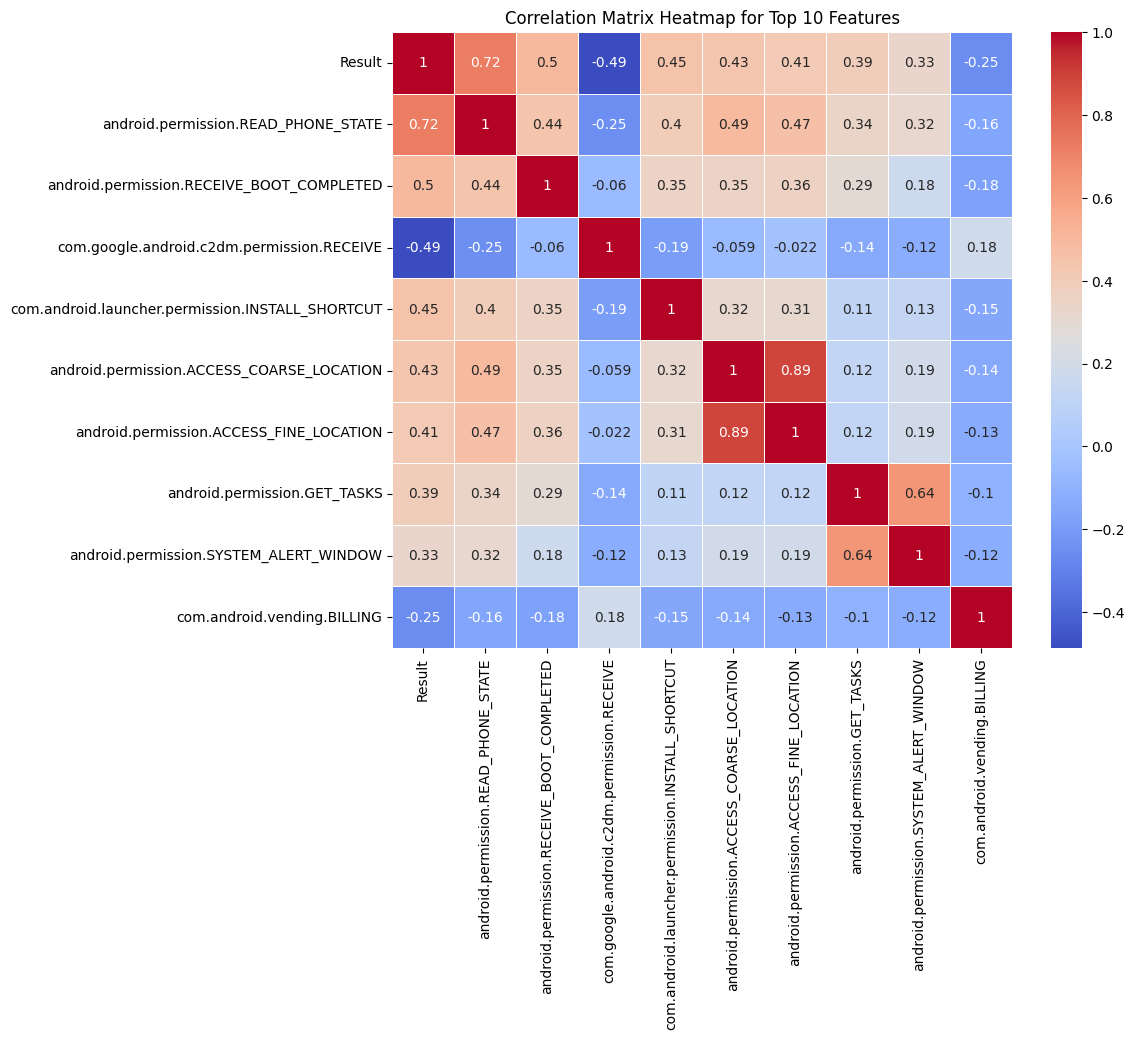

In [3]:
# Correlation Matrix
correlation_with_target = df.corr()['Result'].abs()

top_features = correlation_with_target.sort_values(ascending=False).head(10).index

df_top_features = df[top_features]

correlation_matrix_top = df_top_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_top, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap for Top 10 Features')
plt.show()

12


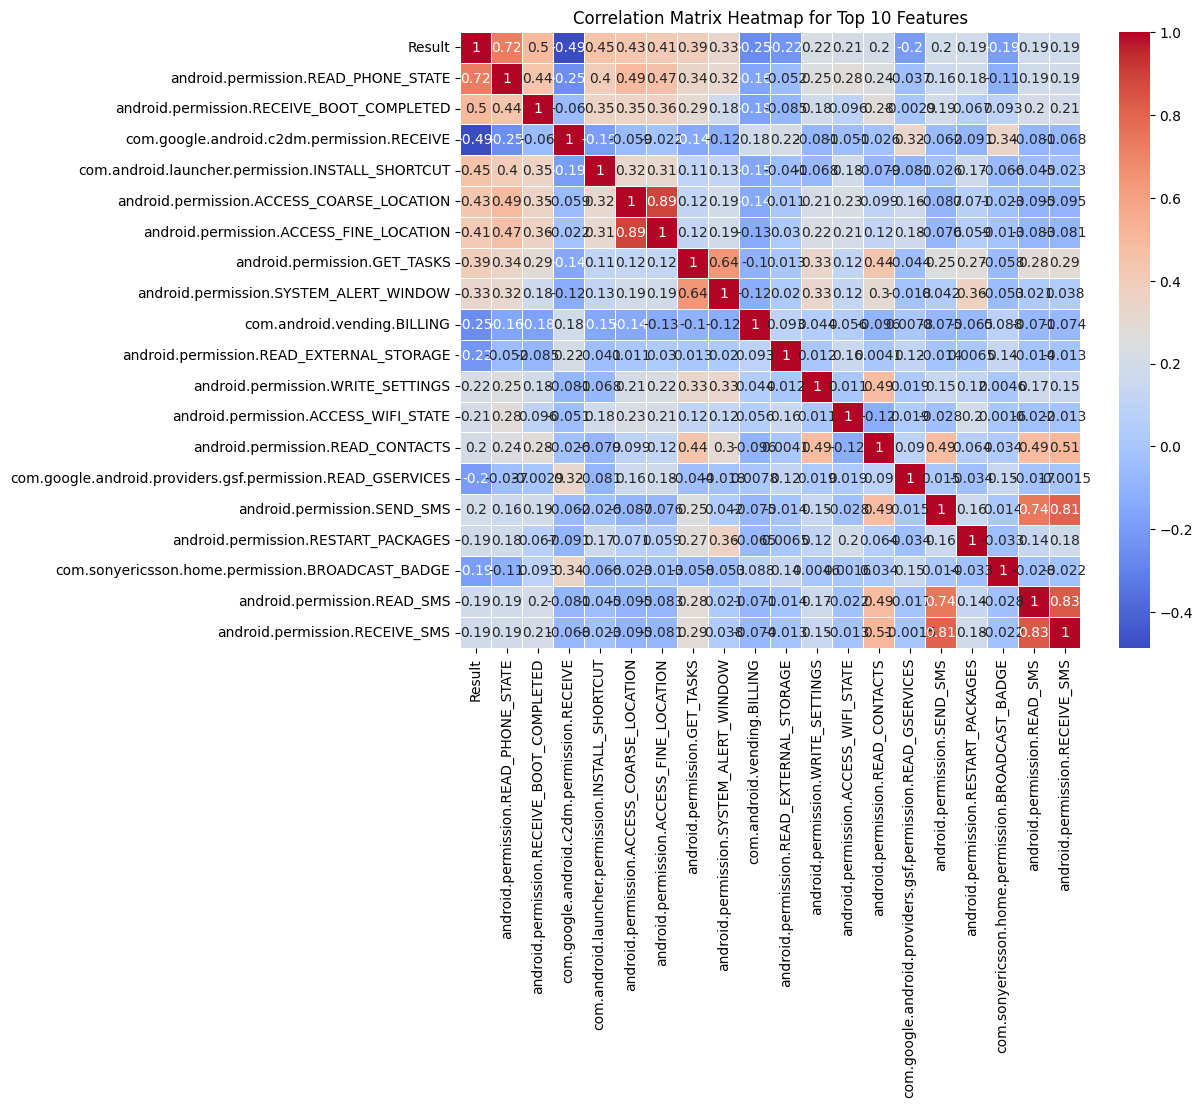

In [6]:
# Set the threshold for correlation
correlation_threshold = 0.9

# Find pairs of highly correlated features
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Create a DataFrame with only the selected features (keeping one from each correlated group)
df_selected_features = df.drop(columns=correlated_features)
print(len(correlated_features))
correlation_with_target = df_selected_features.corr()['Result'].abs()

top_features = correlation_with_target.sort_values(ascending=False).head(20).index

df_top_features = df[top_features]

correlation_matrix_top = df_top_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_top, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap for Top 10 Features')
plt.show()

In [7]:
y = df['Result']
X = df.drop(labels=['Result'], axis=1)

In [8]:
# After removing correlated features
y = df_selected_features['Result']
X = df_selected_features.drop(labels=['Result'], axis=1)

In [12]:
# Taking top 10 features
y = df_top_features['Result']
X = df_top_features.drop(labels=['Result'], axis=1)

In [9]:
y.shape
X.shape

(29332, 74)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=69)

In [12]:
X_train.shape
y_train.shape

(20532,)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [14]:
model_objs = [LogisticRegression(), KNeighborsClassifier(), SVC(kernel='linear'), SVC(kernel='rbf'), SVC(kernel='poly'), DecisionTreeClassifier(), AdaBoostClassifier(), RandomForestClassifier(random_state=69), XGBClassifier()]
model_names = ['LogisticRegression', 'KNeighborsClassifier', 'Linear SVC', 'Gaussian SVC', 'Polynomial SVC', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'RandomForestClassifier', 'XGBClassifier']

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [16]:
for m_obj, m_name in zip(model_objs, model_names):
    m_obj.fit(X_train, y_train),
    y_pred = m_obj.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    roc_auc = roc_auc_score(y_pred, y_test)
    print('MODEL: {}'.format(m_name))
    print('Accuracy: {}'.format(acc))
    # print('Precision: {}'.format(precision))
    # print('Recall: {}'.format(recall))
    # print('F1: {}'.format(f1))
    # print('ROC AUC: {}'.format(roc_auc))
    # print()
    print()

c:\Users\kgrna\Downloads\Kartik\Kartik\ELG5255\GitHub\env1\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEL: LogisticRegression
Accuracy: 0.9568181818181818

MODEL: KNeighborsClassifier
Accuracy: 0.9577272727272728

MODEL: Linear SVC
Accuracy: 0.9522727272727273

MODEL: Gaussian SVC
Accuracy: 0.9629545454545455

MODEL: Polynomial SVC
Accuracy: 0.9581818181818181

MODEL: DecisionTreeClassifier
Accuracy: 0.9631818181818181

MODEL: AdaBoostClassifier
Accuracy: 0.955

MODEL: RandomForestClassifier
Accuracy: 0.9702272727272727

MODEL: XGBClassifier
Accuracy: 0.9679545454545454

